# statistics

> Scripts to generate statistics out of orbit data

In [21]:
#| default_exp stats

In [22]:
#| export
#| hide
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict

In [23]:
#| hide
from fastcore.test import test_eq

## Calculate statistics

In [24]:
#| export
def calculate_overall_statistics(orbits: np.ndarray  # The array containing orbit data of shape (number_of_orbits, 6, number_of_time_instants).
                                 ) -> Dict[str, Dict[str, float]]:
    """
    Calculate the overall min, mean, max, and percentile statistics for each scalar 
    (position and velocity in X, Y, Z) across all time instants and orbits.

    Parameters:
    - orbits (np.ndarray): A numpy array of shape (number_of_orbits, 6, number_of_time_instants) containing orbit data.

    Returns:
    - Dict[str, Dict[str, float]]: A dictionary with statistics ('min', 'mean', 'max', '25%', '50%', '75%') for each scalar.
    """
    stats = {}  # Dictionary to store statistics for each scalar.
    scalar_names = ['posx', 'posy', 'posz', 'velx', 'vely', 'velz']  # List of scalar names for positions and velocities.
    
    for scalar_index, scalar_name in enumerate(scalar_names):
        scalar_data = orbits[:, scalar_index, :].flatten()  # Flatten data to combine all orbits and time points for each scalar.
        
        # Calculate statistics for the current scalar and store them in the dictionary.
        stats[scalar_name] = {
            'min': np.min(scalar_data),  # Minimum value.
            'mean': np.mean(scalar_data),  # Mean value.
            'max': np.max(scalar_data),  # Maximum value.
            '25%': np.percentile(scalar_data, 25),  # 25th percentile.
            '50%': np.median(scalar_data),  # Median, equivalent to the 50th percentile.
            '75%': np.percentile(scalar_data, 75)  # 75th percentile.
        }
    
    return stats  # Return the dictionary containing all calculated statistics.

In [25]:
#| test "basic functionality"
orbits = np.array([
    [[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6], [5, 6, 7], [6, 7, 8]],  # Orbit 1
    [[4, 4, 4], [3, 4, 5], [4, 5, 6], [5, 6, 7], [6, 7, 8], [7, 8, 9]]   # Orbit 2
])

# Call the function to calculate statistics
stats = calculate_overall_statistics(orbits)

# Using test_eq to perform tests
test_eq(stats['posx']['min'], 1)
test_eq(stats['posx']['mean'], 3)
test_eq(stats['posx']['max'], 4)
test_eq(stats['posx']['25%'], 2.25)
test_eq(stats['posx']['50%'], 3.5)
test_eq(stats['posx']['75%'], 4)

## Plot Histograms

In [26]:
#| export
def plot_histograms_position(data: np.ndarray  # The orbit data array of shape (num_orbits, 6, num_time_points).
                            ) -> None:
    """
    Plots histograms for the 6 scalar values (position and velocity in X, Y, Z) across all orbits and time points.
    """
    scalar_names = ['posX', 'posY', 'posZ', 'velX', 'velY', 'velZ']
    num_scalars = len(scalar_names)
    
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # Adjust the subplot layout as necessary
    fig.suptitle('Histograms of Position and Velocity Components Across All Orbits')
    
    for i in range(num_scalars):
        scalar_values = data[:, i, :].flatten()  # Flatten combines all orbits and time points for each scalar
        
        row, col = divmod(i, 3)  # Determine subplot position
        axs[row, col].hist(scalar_values, bins=50, alpha=0.75)  # You can adjust the number of bins
        axs[row, col].set_title(f'{scalar_names[i]}')
        axs[row, col].set_ylabel('Frequency')
        axs[row, col].set_xlabel('Value')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the main title
    plt.show()

In [27]:
from orbit_generation.data import get_example_orbit_data

orbit_data = get_example_orbit_data()
orbit_data.shape

(200, 6, 300)

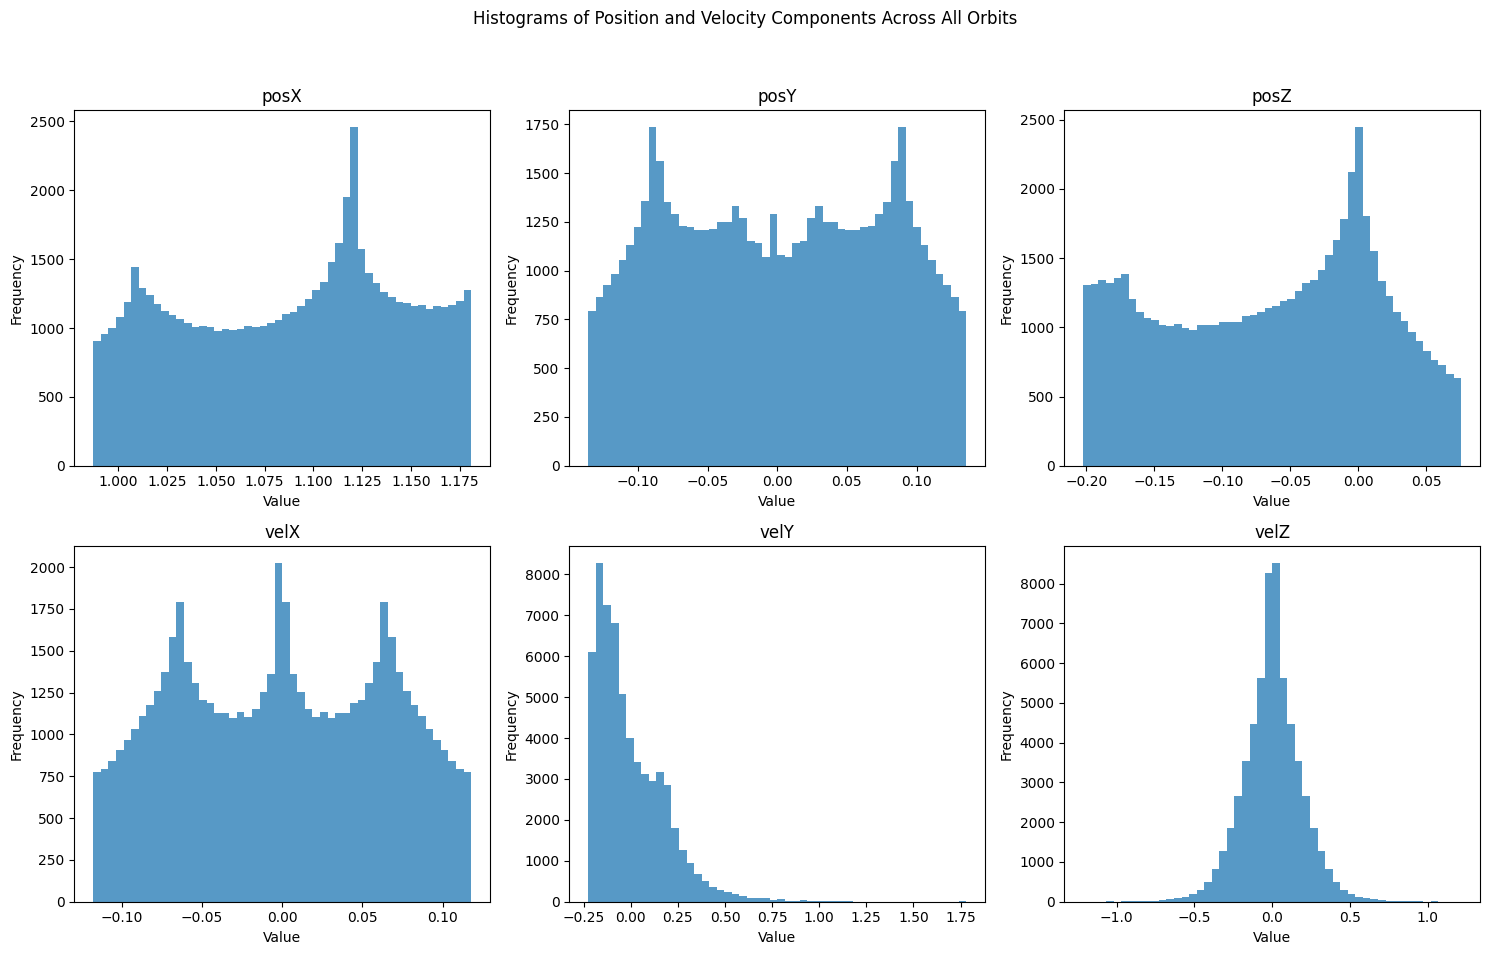

In [28]:
#| test plot_histograms_position
plot_histograms_position(orbit_data)

In [29]:
#| export
def plot_histograms_comparison(data1: np.ndarray,  # First orbit data array of shape (num_orbits, 6, num_time_points).
                               data2: np.ndarray,  # Second orbit data array of shape (num_orbits, 6, num_time_points).
                               ) -> None:
    """
    Plots histograms for the 6 scalar values (position and velocity in X, Y, Z) from two datasets on the same chart with different colors.

    Parameters:
    - data1 (np.ndarray): First orbit data array.
    - data2 (np.ndarray): Second orbit data array.
    """
    scalar_names = ['posX', 'posY', 'posZ', 'velX', 'velY', 'velZ']
    num_scalars = len(scalar_names)
    
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # Create a grid of 2x3 subplots
    fig.suptitle('Comparative Histograms of Position and Velocity Components')

    # Define colors for the histograms
    colors = ['blue', 'green']  # First dataset in blue, second in green
    
    for i in range(num_scalars):
        # Flatten the data to combine all orbits and time points for each scalar
        scalar_values1 = data1[:, i, :].flatten()
        scalar_values2 = data2[:, i, :].flatten()
        
        # Determine subplot position
        row, col = divmod(i, 3)
        
        # Plot histograms for each dataset on the same subplot
        axs[row, col].hist(scalar_values1, bins=50, alpha=0.75, color=colors[0], label='Dataset 1')
        axs[row, col].hist(scalar_values2, bins=50, alpha=0.75, color=colors[1], label='Dataset 2')
        
        axs[row, col].set_title(f'{scalar_names[i]}')
        axs[row, col].set_ylabel('Frequency')
        axs[row, col].set_xlabel('Value')
        axs[row, col].legend()  # Add a legend to differentiate between datasets
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the main title
    plt.show()

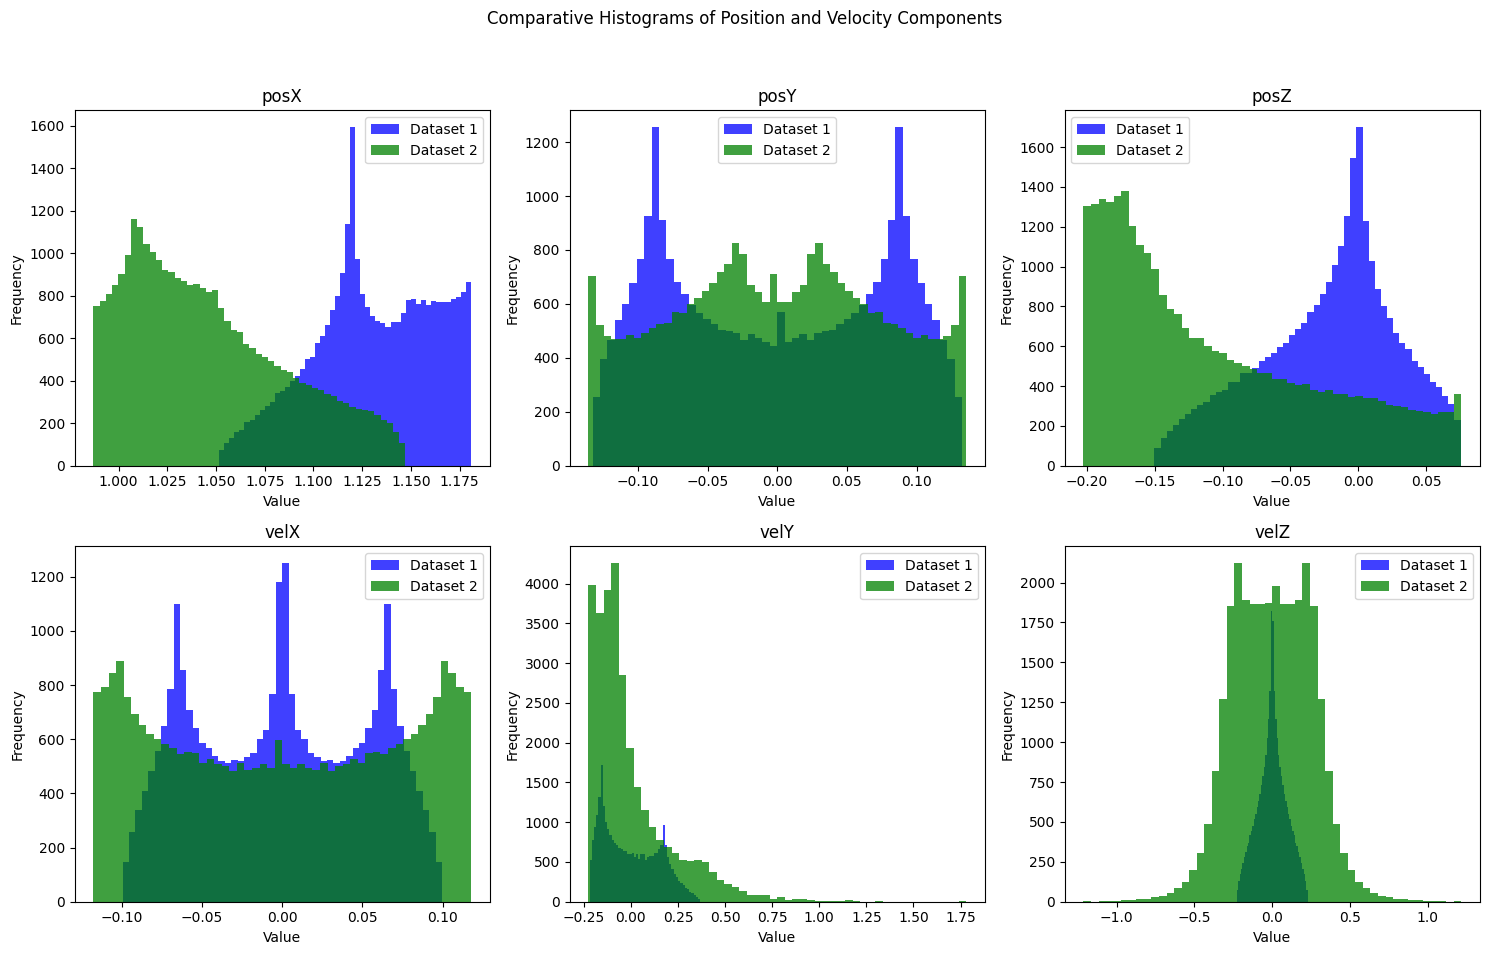

In [30]:
orbit_data1 = orbit_data[:100]
orbit_data2 = orbit_data[100:]

plot_histograms_comparison(orbit_data1, orbit_data2)

In [31]:
#| hide
import nbdev; nbdev.nbdev_export()